In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import optuna
from skopt import BayesSearchCV
pd.set_option('display.max_columns', None)

C:\Users\abhir\anaconda3\envs\wildfire-data-mining\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
training_df=pd.read_csv("../Datasets/training_df_raw.csv")
training_df.fillna(0,inplace=True)
training_df.drop(['date','time'],axis=1,inplace=True)
training_df.head()

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,surface_pressure,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,vapour_pressure_deficit,wind_speed_10m,wind_speed_100m,wind_direction_10m,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,fire
0,10.4600,95.42882,9.7600,9.326071,0.0,0.0,0.0,0.0,0.0,1012.4,1012.03436,3.9,4.0,0.0,1.0,0.0,0.057978,7.421590,12.229406,112.833694,137.38599,11.879999,10.7600,13.110001,14.0100,21.910000,0.275,0.318,0.195,0.026,1
1,10.4535,95.42859,9.7535,9.317741,0.0,0.0,0.0,0.0,0.0,1012.4,1011.91230,3.9,4.0,0.0,1.0,0.0,0.057956,7.421590,12.229406,112.833694,137.38599,11.879999,10.7535,13.103500,14.0035,21.903500,0.275,0.318,0.195,0.026,1
2,10.4145,95.42721,9.7145,9.267784,0.0,0.0,0.0,0.0,0.0,1012.4,1011.18120,3.9,4.0,0.0,1.0,0.0,0.057823,7.421590,12.229406,112.833694,137.38599,11.879999,10.7145,13.064501,13.9645,21.864500,0.275,0.318,0.195,0.026,1
3,9.2235,99.66392,9.1735,8.143780,0.0,0.0,0.0,0.0,0.0,1012.5,1010.78680,2.7,3.0,0.0,0.0,0.0,0.003924,5.937272,11.885453,75.963730,125.13428,13.320000,10.4235,12.823500,13.7235,21.923500,0.273,0.324,0.201,0.020,1
4,9.2430,99.66399,9.1930,8.168585,0.0,0.0,0.0,0.0,0.0,1012.5,1011.15370,2.7,3.0,0.0,0.0,0.0,0.003929,5.937272,11.885453,75.963730,125.13428,13.320000,10.4430,12.842999,13.7430,21.942999,0.273,0.324,0.201,0.020,1


In [3]:
training_df.columns

Index(['temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'apparent_temperature', 'precipitation', 'rain', 'snowfall',
       'snow_depth', 'weather_code', 'pressure_msl', 'surface_pressure',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'et0_fao_evapotranspiration', 'vapour_pressure_deficit',
       'wind_speed_10m', 'wind_speed_100m', 'wind_direction_10m',
       'wind_direction_100m', 'wind_gusts_10m', 'soil_temperature_0_to_7cm',
       'soil_temperature_7_to_28cm', 'soil_temperature_28_to_100cm',
       'soil_temperature_100_to_255cm', 'soil_moisture_0_to_7cm',
       'soil_moisture_7_to_28cm', 'soil_moisture_28_to_100cm',
       'soil_moisture_100_to_255cm', 'fire'],
      dtype='object')

In [4]:
training_df.shape

(113896, 31)

In [5]:
features_to_drop = [
    'snow_depth', 
    'weather_code',  
    'precipitation', 
    'rain', 
    'wind_speed_100m',
    'apparent_temperature',
    'soil_temperature_28_to_100cm',
    'snowfall'
]

training_df.drop(columns=features_to_drop, inplace=True)

print(training_df.columns)

Index(['temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'pressure_msl', 'surface_pressure', 'cloud_cover', 'cloud_cover_low',
       'cloud_cover_mid', 'cloud_cover_high', 'et0_fao_evapotranspiration',
       'vapour_pressure_deficit', 'wind_speed_10m', 'wind_direction_10m',
       'wind_direction_100m', 'wind_gusts_10m', 'soil_temperature_0_to_7cm',
       'soil_temperature_7_to_28cm', 'soil_temperature_100_to_255cm',
       'soil_moisture_0_to_7cm', 'soil_moisture_7_to_28cm',
       'soil_moisture_28_to_100cm', 'soil_moisture_100_to_255cm', 'fire'],
      dtype='object')


In [6]:
training_df.shape

(113896, 23)

### Target variable -> y is fire

In [7]:
X=training_df.drop('fire',axis=1)
y=training_df['fire']

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
scaler = StandardScaler()

X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [10]:
dt_model = DecisionTreeClassifier()


In [11]:
dt_cv_scores = cross_val_score(dt_model, X_train_transformed, y_train, cv=5, scoring='accuracy')

print("Decision Tree Cross-Validation Scores: ", dt_cv_scores)
print("Decision Tree Mean Accuracy: ", np.mean(dt_cv_scores))


Decision Tree Cross-Validation Scores:  [0.78061896 0.78527136 0.78916754 0.78916754 0.78828952]
Decision Tree Mean Accuracy:  0.7865029839327882


In [12]:
dt_model.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [13]:
# Assuming you have feature names in a DataFrame 'X_train' (or as a list)
importance = dt_model.feature_importances_

feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'Feature {i}' for i in range(X_train.shape[1])]

# Combine feature names with importance values
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)


                          Feature  Importance
9      et0_fao_evapotranspiration    0.144837
16     soil_temperature_7_to_28cm    0.110112
15      soil_temperature_0_to_7cm    0.095164
4                surface_pressure    0.063865
11                 wind_speed_10m    0.062475
1            relative_humidity_2m    0.052666
3                    pressure_msl    0.044007
12             wind_direction_10m    0.042899
2                    dew_point_2m    0.042683
13            wind_direction_100m    0.041273
14                 wind_gusts_10m    0.041157
18         soil_moisture_0_to_7cm    0.038014
0                  temperature_2m    0.037172
10        vapour_pressure_deficit    0.035529
17  soil_temperature_100_to_255cm    0.034087
21     soil_moisture_100_to_255cm    0.026190
19        soil_moisture_7_to_28cm    0.022040
20      soil_moisture_28_to_100cm    0.021525
5                     cloud_cover    0.020462
8                cloud_cover_high    0.010195
7                 cloud_cover_mid 

In [14]:
y_train_pred_dt = dt_model.predict(X_train_transformed)

train_accuracy = accuracy_score(y_train, y_train_pred_dt)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')


Training Accuracy: 99.89%


Accuracy: 80.36%
Precision: 80.37%
Recall: 80.36%
F1 Score: 80.35%


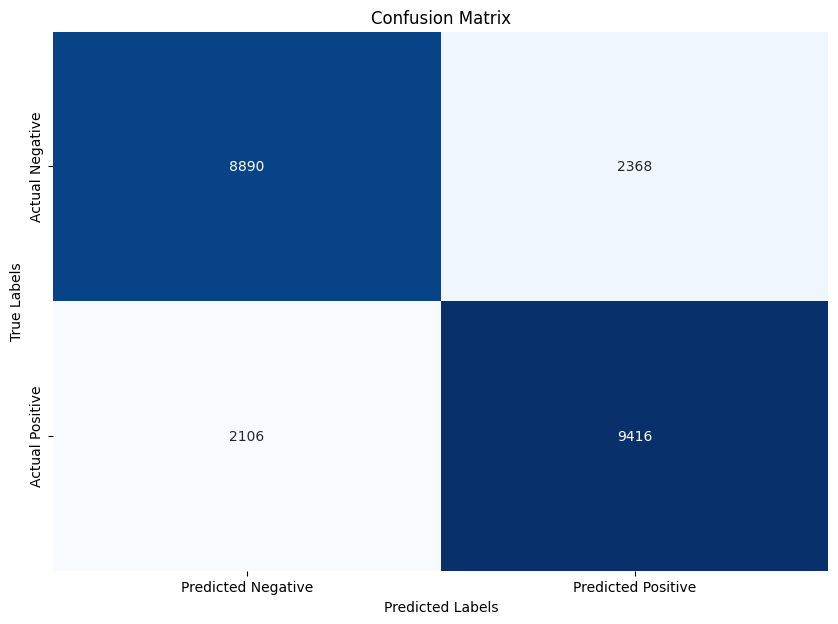

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80     11258
           1       0.80      0.82      0.81     11522

    accuracy                           0.80     22780
   macro avg       0.80      0.80      0.80     22780
weighted avg       0.80      0.80      0.80     22780



In [15]:
y_pred_dt = dt_model.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report for detailed metrics
class_report = classification_report(y_test, y_pred_dt)
print('Classification Report:')
print(class_report)


In [17]:
def objective(trial):
    max_depth = trial.suggest_int("max_depth", 2, 30)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 50)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 50)
    max_features = trial.suggest_float("max_features", 0.5, 1.0)
    ccp_alpha = trial.suggest_float("ccp_alpha", 1e-5, 1e-3, log=True)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        criterion=criterion,
        ccp_alpha=ccp_alpha
    )

    dt_cv_scores = cross_val_score(model, X_train_transformed, y_train, cv=5, scoring='accuracy')
    return dt_cv_scores.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=200)

# Output the best hyperparameters and score
print("Best hyperparameters: ", study.best_params)
print("Best cross-validation accuracy: ", study.best_value)


[I 2024-11-16 23:47:51,131] A new study created in memory with name: no-name-79325fe4-c098-4758-9dfc-fa46f91af579
[I 2024-11-16 23:48:11,438] Trial 0 finished with value: 0.7553777042124258 and parameters: {'max_depth': 24, 'min_samples_split': 25, 'min_samples_leaf': 28, 'max_features': 0.7530203744112838, 'ccp_alpha': 6.384439600971514e-05, 'criterion': 'entropy'}. Best is trial 0 with value: 0.7553777042124258.
[I 2024-11-16 23:48:15,295] Trial 1 finished with value: 0.6163680086049348 and parameters: {'max_depth': 3, 'min_samples_split': 36, 'min_samples_leaf': 44, 'max_features': 0.6786161322471929, 'ccp_alpha': 1.4679412387975821e-05, 'criterion': 'entropy'}. Best is trial 0 with value: 0.7553777042124258.
[I 2024-11-16 23:48:25,708] Trial 2 finished with value: 0.7443258995219549 and parameters: {'max_depth': 23, 'min_samples_split': 40, 'min_samples_leaf': 34, 'max_features': 0.5395274121667646, 'ccp_alpha': 2.0296450493450835e-05, 'criterion': 'gini'}. Best is trial 0 with val

Best hyperparameters:  {'max_depth': 29, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 0.9889774917343632, 'ccp_alpha': 3.2046527947827895e-05, 'criterion': 'gini'}
Best cross-validation accuracy:  0.7925282534006919


In [18]:
best_dt_model = DecisionTreeClassifier(
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf'],
    max_features=study.best_params['max_features'],
    criterion=study.best_params['criterion'],
    ccp_alpha = study.best_params['ccp_alpha']
)

best_dt_model.fit(X_train_transformed, y_train)

y_train_pred_dt = best_dt_model.predict(X_train_transformed)

train_accuracy = accuracy_score(y_train, y_train_pred_dt)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

Training Accuracy: 91.73%


Accuracy: 80.71%
Precision: 78.83%
Recall: 84.57%
F1 Score: 81.60%


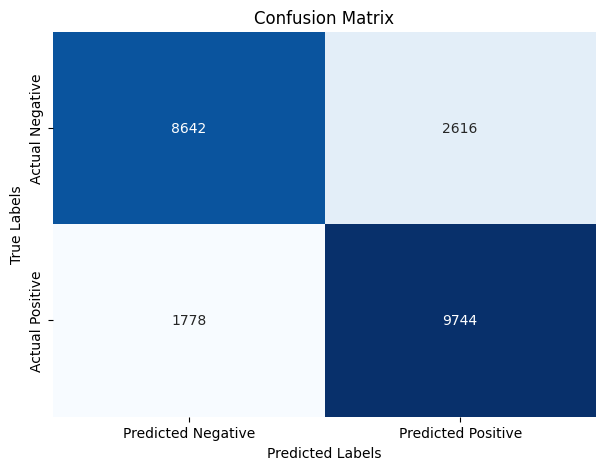

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80     11258
           1       0.79      0.85      0.82     11522

    accuracy                           0.81     22780
   macro avg       0.81      0.81      0.81     22780
weighted avg       0.81      0.81      0.81     22780



In [19]:
y_pred_dt = best_dt_model.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy * 100:.2f}%')

precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

class_report = classification_report(y_test, y_pred_dt)
print('Classification Report:')
print(class_report)


In [20]:
importances = best_dt_model.feature_importances_
feature_names=X.columns
feature_imp_df = pd.DataFrame({'Feature': X.columns.tolist(), 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
feature_imp_df

,Feature,Gini Importance
9,et0_fao_evapotranspiration,0.172571
16,soil_temperature_7_to_28cm,0.121002
15,soil_temperature_0_to_7cm,0.103514
11,wind_speed_10m,0.067758
4,surface_pressure,0.056857
1,relative_humidity_2m,0.046967
14,wind_gusts_10m,0.043501
3,pressure_msl,0.042085
12,wind_direction_10m,0.039018
18,soil_moisture_0_to_7cm,0.038629


In [21]:
y_scores = best_dt_model.predict_proba(X_test_transformed)[:, 1]

AUC-ROC Score: 0.8426454073708668


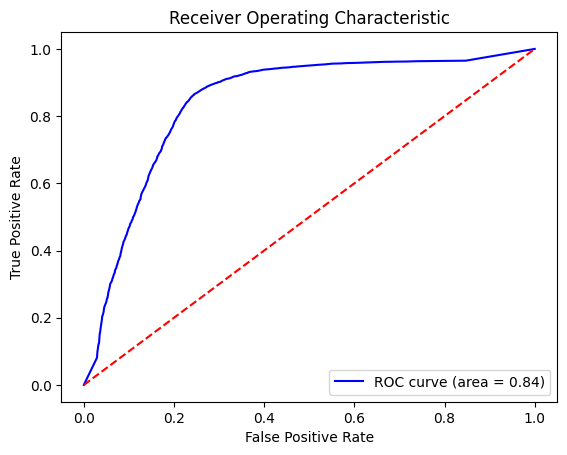

In [22]:
auc_score = roc_auc_score(y_test, y_scores)
print("AUC-ROC Score:", auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()